In [1]:
# Neural Networks - MNIST: simple NN model for MNIST handwritten digit dataset classification 
# Shomik Jain, USC CAIS++

# References: https://keras.io, https://keras.io/getting-started/sequential-model-guide/

In [2]:
# Neural Networks: directed, weighted graph with layers of neurons/nodes
# each successive layer = increasingly abstract combinations of features from previous layer
# network learns relevant combinations of features to make more accurrate predictions

In [3]:
# 1. Import Dataset & Data Pre-Processing

In [4]:
# Import MNIST from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step


In [5]:
# Data exploration

print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [6]:
# Input shape: 60000 examples
# Each image: 28 x 28

train_x.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

5


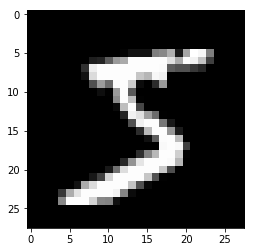

In [8]:
# Visualize the input samples

sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

In [9]:
# flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

In [10]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [11]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# Result of categorizing the outputs
print(test_y_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [12]:
# 2. Create Neural Network Model

In [13]:
# 2.1 -- Initialize the model, add desired layers 

from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# Hidden layer 1: 500 neurons
model.add(Dense(units=500, input_dim=784)) # Dense = fully-connected
model.add(Activation('relu')) # Relu activation (avoid unstable gradient problem)

# Hidden layer 2: 250 neurons
model.add(Dense(units=250))
model.add(Activation('relu'))

# Output layer: 10 neurons (one for each class)
model.add(Dense(units=10))
# Softmax activation: output a probability distribution, between 0-1
model.add(Activation('softmax'))

In [14]:
# 2.2 -- Compile the model, get ready to train

model.compile(loss='categorical_crossentropy', # specify crossentropy cost function 
              optimizer='sgd', # stochastic gradient descent
              metrics=['accuracy'])

model.summary()

In [15]:
# 2.3 -- Set up the callbacks to track the model training/improvement

# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [16]:
# 2.4 -- Fit the model to the training data

# 20 epochs, 32 batch size
# Batch Size: size of training data subset used during each stochastic gradient descent step  

# Validation split: reserve some of our training data to use as "validation" data
    # Won't train on validation data -- check validation loss to look for overfitting
    # used to tune hyperparameters, allows for test set to be used for final evaluation 
    
# Pass in our callbacks to track training progress

model.fit(train_x_flattened, train_y_categorical, epochs=20, \
          batch_size=32, verbose=0, validation_split = .1, callbacks=callbacks_list)

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

In [17]:
# Note: To launch Tensorboard after training
# Type in command line: `tensorboard --logdir ./logs`
# Open in browser: `http://localhost:6006`

In [18]:
# 3. Evaluate trained model on test data
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 44us/step
[0.076238433163613076, 0.97770000000000001]


[[  2.26596148e-06   3.30093854e-07   1.44131511e-04   1.11688499e-03
    3.88690324e-08   1.86289822e-06   3.44290395e-11   9.98685181e-01
    1.07624228e-05   3.86974752e-05]]
7


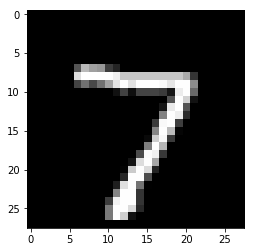

In [19]:
# Make sure predictions make sense
import numpy as np

sample_num = 0 # which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # create a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores)

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print(predicted_class)

# Actual input
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()